# ConvNets for recognizing handwritten digits

CNNs apply convolution and pooling operations in two dimensions for images along the (height x width) dimensions. 
For images, sliding the filter over input volume produces a map that gives
the responses of the filter for each spatial position. In other words, a ConvNet has multiple filters
stacked together which learn to recognize specific visual features independently of the location in the
image. Those visual features are simple in the initial layers of the network, and then more and more
sophisticated deeper in the network.

MNIST database of handwritten digits made up of a training set of 60,000 examples and a test set of 10,000 examples.
The training examples are annotated by humans with the correct answer. Each MNIST image is in gray scale, and it consists of 28 x 28 pixels.

In [35]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.utils import layer_utils, plot_model
from keras.preprocessing import image
from keras import initializers
from keras import regularizers
from keras.utils import np_utils
from PIL import Image
import os
import matplotlib.pyplot as plt

In [36]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("number of training examples = " + str(X_train.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

number of training examples = 60000
number of test examples = 10000
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [37]:
X_train = X_train[:, :, : , np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28, 1)
X_test shape (10000, 28, 28, 1)
y_train shape (60000, 1)
y_test shape (10000, 1)


In [38]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train = X_train/255                        
X_test = X_test/255

In [39]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

# Convolution Layer 1
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Poolinig Layer 1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Convolution Layer 2
model.add(Conv2D(64,(3, 3)))                         
model.add(BatchNormalization())              
model.add(Activation('relu'))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

# FC Layer
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
keep_prob = 0.1
model.add(Dropout(keep_prob))
model.add(Dense(10,activation='softmax'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
activation_11 (Activation)   (None, 11, 11, 64)        0         
__________

In [41]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT= 0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (IMG_ROWS, IMG_COLS,1)

In [42]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [43]:
model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

In [44]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 283s 6ms/step - loss: 0.0182 - acc: 0.9943 - val_loss: 0.0092 - val_acc: 0.9972
Epoch 2/20
48000/48000 [==============================] - 276s 6ms/step - loss: 0.0057 - acc: 0.9982 - val_loss: 0.0099 - val_acc: 0.9965
Epoch 3/20
48000/48000 [==============================] - 275s 6ms/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0131 - val_acc: 0.9956
Epoch 4/20
48000/48000 [==============================] - 279s 6ms/step - loss: 0.0022 - acc: 0.9994 - val_loss: 0.0073 - val_acc: 0.9973
Epoch 5/20
48000/48000 [==============================] - 276s 6ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0051 - val_acc: 0.9984
Epoch 6/20
48000/48000 [==============================] - 276s 6ms/step - loss: 7.4967e-04 - acc: 0.9998 - val_loss: 0.0099 - val_acc: 0.9968
Epoch 7/20
48000/48000 [==============================] - 275s 6ms/step - loss: 8.8855e-04 - acc: 0.9998 - val_loss: 0

In [45]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 12s 1ms/step
Test score: 0.004819888142101331
Test accuracy: 0.9986099969863892


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
10000/10000 [==============================] - 12s 1ms/step


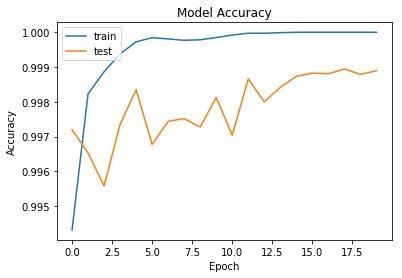

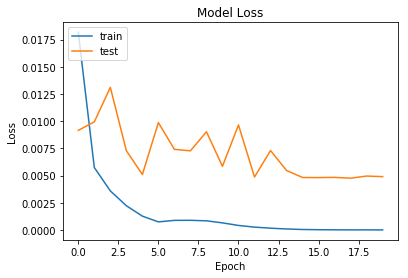

[Test score - 0.004819888142101331
[Test accuracy - 0.9986099969863892


In [46]:
# print the history keys
print (history.history.keys())

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# print the results
print ("[Test score - {}".format(scores[0]))
print ("[Test accuracy - {}".format(scores[1]))